In [97]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [98]:
#reding the dataset
df=pd.read_csv('day.csv')

In [99]:
#dataframe overview
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [100]:
#check the number of records and columns
df.shape

(730, 16)

In [101]:
#lets get mathematical factors
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [102]:
#lets get more info about the data given
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here we found there is no missing values. So no need to do any further inputations

In [103]:
#Droping the unwanted columns
df.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [104]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [105]:
#Looking at each attributes 1 by 1 and doing the analysis

In [106]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [107]:
#converting into respective seasons by mapping
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [108]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

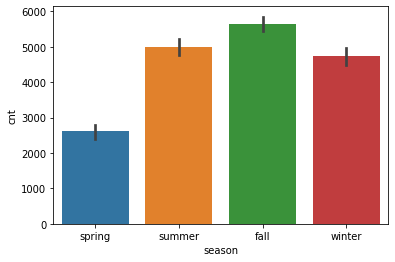

In [109]:
sns.barplot('season','cnt',data=df)
plt.show()

We observed usage of bikes were more un fall season than any other

In [110]:
#Checking month column
df['mnth'].value_counts()


12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [111]:
#Similarly mapping months for their respective numeric representations
df['mnth']=df['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

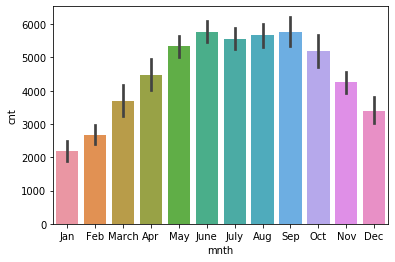

In [112]:
sns.barplot('mnth','cnt',data=df)
plt.show()

### We observed usage of bikes were more in June Month

In [113]:
#Analysing week day columns
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [114]:
#Mapping days of the week with respective values
df['weekday']=df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

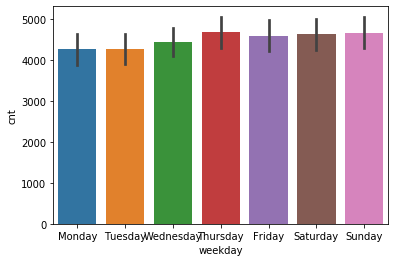

In [115]:
sns.barplot('weekday','cnt',data=df)
plt.show()

In [116]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [117]:
df['weathersit']=df['weathersit'].map({1:'Clear',2:'Mist ',3:'Light Snow',4:'Heavy Rain'})

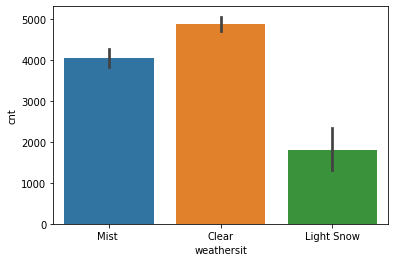

In [118]:
sns.barplot('weathersit','cnt',data=df)
plt.show()

In [119]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


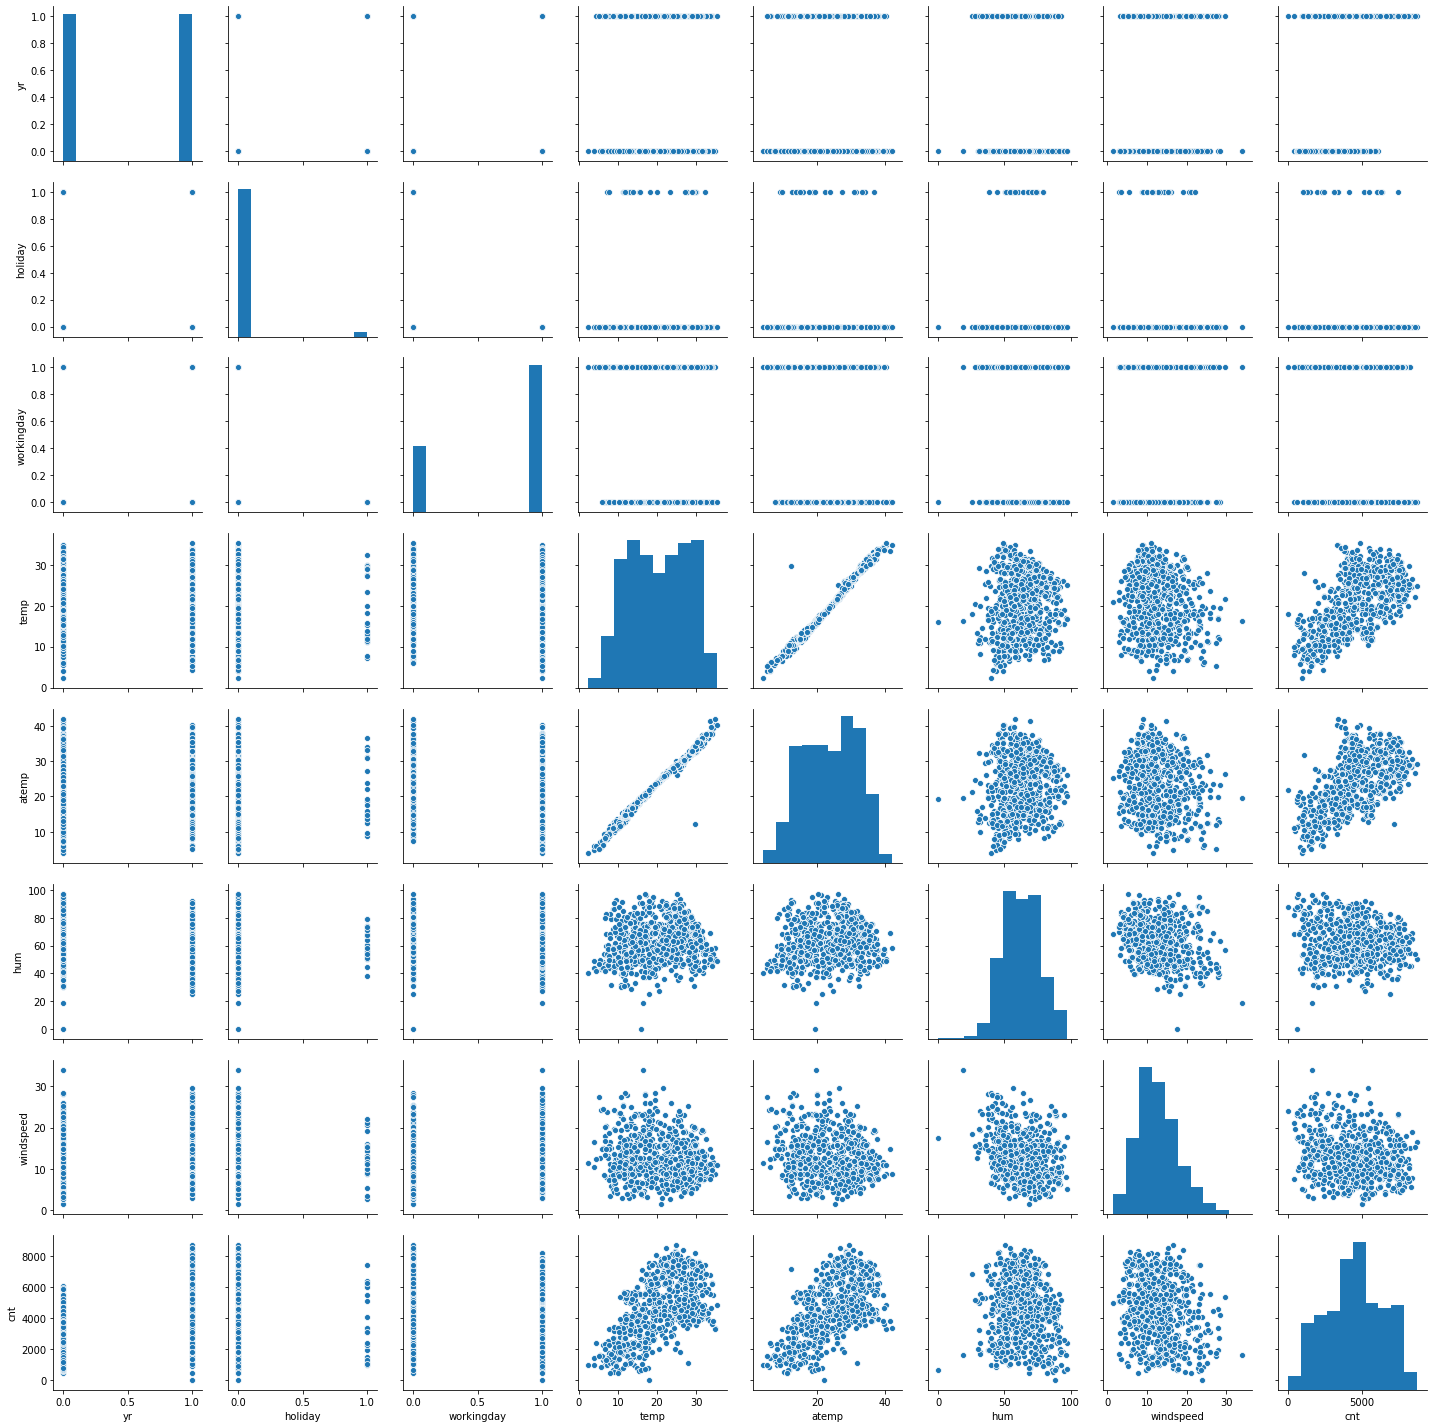

In [120]:
sns.pairplot(df)
plt.show()

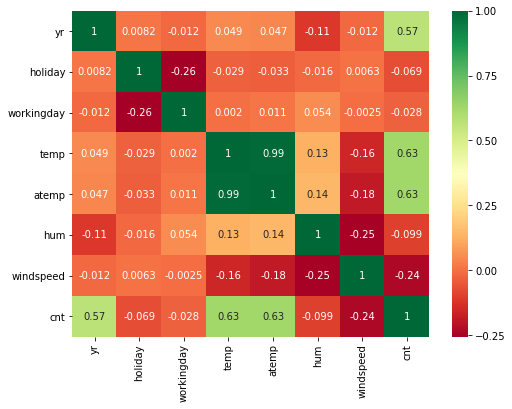

In [121]:
#Finding co-relation between the attribues
plt.figure(figsize = (8,6))
ax=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

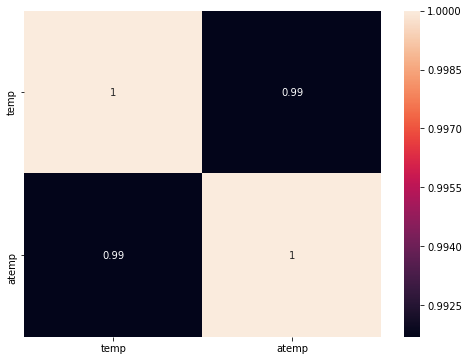

In [122]:
#Finding corelation between temp and atemp attributes
temperature=df[['temp','atemp']]
plt.figure(figsize = (8,6))
ax=sns.heatmap(temperature.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [123]:
#Since we observed temperature is highly corelated with atemperature. So droppong atemp attribute to resolve multicollinearity
df.drop('atemp',axis=1,inplace=True)

In [124]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


# Creating Dummy Variables

In [125]:
seasons = pd.get_dummies(df['season'],drop_first=True)

In [126]:
seasons.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [127]:
#Simolarly creating dummy variables for other categorical variables
weather= pd.get_dummies(df['weathersit'],drop_first=True)
month= pd.get_dummies(df['mnth'],drop_first=True)
weekdays= pd.get_dummies(df['weekday'],drop_first=True)


In [128]:
#Concatinating createed 4 dataframes with Main Dataframe
df= pd.concat([df,seasons,weather,month,weekdays],axis=1)

In [129]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,1,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# Dropping these categorical variables as dummy variables are created
df.drop(['season','weekday','weathersit','mnth'],axis=1,inplace=True)

In [131]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Model by VIF method

Creating Train And Test Dataset by Splitting data sent into 70:30 Ratio

In [132]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size = 0.7,test_size = 0.3, random_state = 100)

In [133]:
df_train.shape

(510, 29)

In [134]:
#Performing Rescalling Operations
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [135]:
#Performing scalling for Numerical Variables
num=['temp','hum','windspeed','cnt']
df_train[num]= scaler.fit_transform(df_train[num])

In [136]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [137]:
#Dividing into X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

### Building Linear Model

In [138]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
#Setting Number of Recursive Feature Elimination (RFE) number of output variables=10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', False, 11),
 ('windspeed', False, 6),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist ', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 18),
 ('March', False, 19),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 8),
 ('Sunday', False, 9),
 ('Thursday', False, 17),
 ('Tuesday', False, 12),
 ('Wednesday', False, 15)]

In [141]:
#Selecting only those columns provided by RFE with high rankings
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'Light Snow', 'Mist ',
       'July', 'Nov', 'Sep'],
      dtype='object')

In [142]:
#Building model using statsmodel, for the detailed statistics
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [143]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [144]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [145]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.68e-181
Time:                        15:29:33   Log-Likelihood:                -281.22
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     499   BIC:                             631.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2908      0.043     -6.829      0.0

In [146]:
#Droping November as its P value is more than 0.05
X_train1= X_train_rfe.drop('Nov',1)

In [147]:
X_train2= sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train2).fit() 

In [148]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.16e-181
Time:                        15:29:33   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2970      0.043     -6.985      0.0

In [149]:
#Since p value of all attribues is less than 0.05 we can stop here

In [150]:
X_train_new= X_train2.drop('const',axis=1)

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.41
3,spring,2.21
0,yr,1.67
4,winter,1.55
6,Mist,1.36
7,July,1.34
8,Sep,1.16
5,Light Snow,1.05
1,holiday,1.04


In [152]:
#Since the UIF values of all the attribues less than 5 , we can stop here

# Residual analysis of train data

In [153]:
y_train_pred = lm.predict(X_train2)

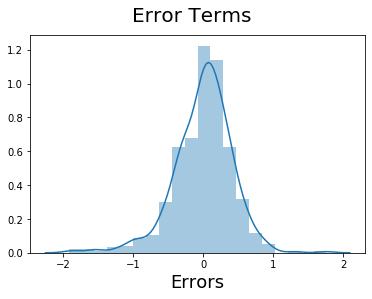

In [154]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

The error terms are normally distributed.

In [155]:
#Now Making Predictions

num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])


In [156]:
#Making Y and X from Test Set
y_test = df_test.pop('cnt')
X_test = df_test

In [157]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [158]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

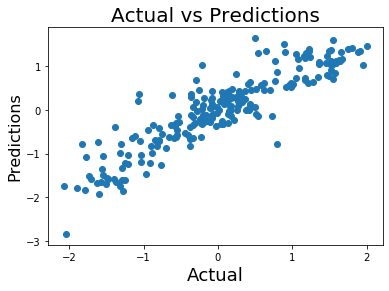

In [159]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)
plt.show()

# Printing r2 score

In [160]:
#Printing r2
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8092200832884747

# Building Model by Manual Analysis

In [161]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train_1, df_test1 = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [163]:
# Apply scaler() to all the columns except dummy variables
num_vars = ['temp','hum','windspeed','cnt']
df_train_1[num_vars] = scaler.fit_transform(df_train_1[num_vars])

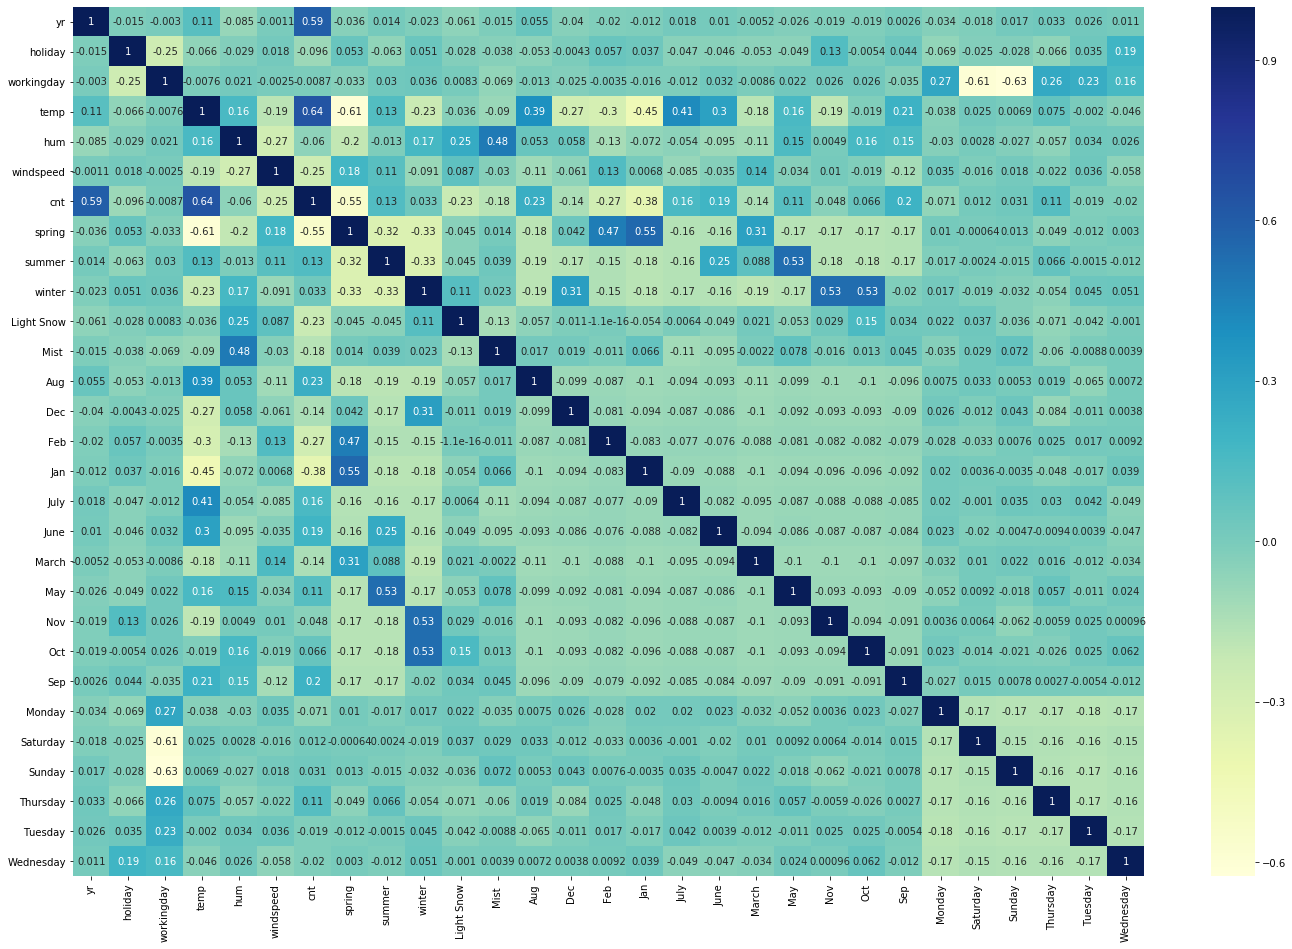

In [164]:
plt.figure(figsize = (24, 16))
ax=sns.heatmap(df_train_1.corr(), annot = True, cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

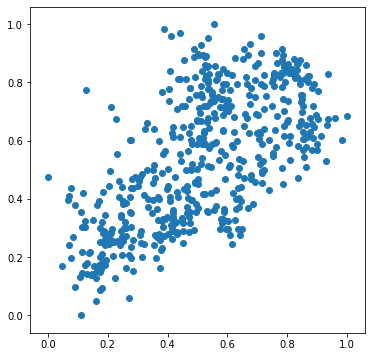

In [165]:
plt.figure(figsize=[6,6])
plt.scatter(df_train_1.cnt, df_train_1.temp)
plt.show()

In [166]:
#Dividing into X and Y sets for the model building

y_train_1 = df_train_1.pop('cnt')
X_train_1 = df_train_1

In [167]:
#Building a linear model
import statsmodels.api as sm
# Add a constant
X_train_lm_1 = sm.add_constant(X_train_1[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train_1, X_train_lm_1).fit()

In [168]:
# Check the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

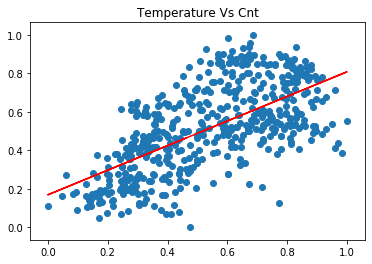

In [169]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm_1.iloc[:, 1], y_train_1)
plt.plot(X_train_lm_1.iloc[:, 1], 0.169 + 0.639*X_train_lm_1.iloc[:, 1], 'r')
plt.title("Temperature Vs Cnt")
plt.show()

In [170]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           5.80e-61
Time:                        15:29:52   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [171]:
#Adding another variable
#Since year also has high co relation, adding to train set
X_train_lm_1 = X_train_1[['temp', 'yr']]

In [172]:
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [173]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          9.25e-130
Time:                        15:29:52   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

In [174]:
#On Adding Year We see the raise in R value from 0.41 to 0.69


In [175]:
#Adding Aug Variable 
X_train_lm_1 = X_train_1[['temp', 'yr','spring']]
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const     0.202479
temp      0.416707
yr        0.240802
spring   -0.144075
dtype: float64

In [176]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     475.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.50e-147
Time:                        15:29:53   Log-Likelihood:                 380.27
No. Observations:                 510   AIC:                            -752.5
Df Residuals:                     506   BIC:                            -735.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2025      0.019     10.795      0.0

In [177]:
#Adding Spring has increased R value from 0.69 to 0.73
#Adding June now
X_train_lm_1 = X_train_1[['temp', 'yr','spring','June']]
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const     0.203817
temp      0.412775
yr        0.240928
spring   -0.144309
June      0.010301
dtype: float64

In [178]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.77e-145
Time:                        15:29:54   Log-Likelihood:                 380.40
No. Observations:                 510   AIC:                            -750.8
Df Residuals:                     505   BIC:                            -729.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2038      0.019     10.752      0.0

In [179]:
#On Adding June we have seen that p value is greater  than 0.05, so it must not used
X_train_lm_1= X_train_lm_1.drop('June',axis=1)

In [180]:
#Adding July 
X_train_lm_1 = X_train_1[['temp', 'yr','spring','July']]
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const     0.184069
temp      0.459580
yr        0.239601
spring   -0.137785
July     -0.072486
dtype: float64

In [181]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     367.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.76e-148
Time:                        15:29:55   Log-Likelihood:                 386.19
No. Observations:                 510   AIC:                            -762.4
Df Residuals:                     505   BIC:                            -741.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1841      0.019      9.531      0.0

In [182]:
#July Attribute can be retained as it improves R score and has p value less than 0.05

In [183]:
X_train_lm_1 = X_train_1[['temp', 'yr','spring','July','Sep']]
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const     0.187245
temp      0.444120
yr        0.240226
spring   -0.136682
July     -0.062675
Sep       0.047195
dtype: float64

In [184]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     298.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.99e-148
Time:                        15:29:55   Log-Likelihood:                 389.21
No. Observations:                 510   AIC:                            -766.4
Df Residuals:                     504   BIC:                            -741.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1872      0.019      9.721      0.0

In [185]:
X_train_lm_1 = X_train_1[['temp', 'yr','spring','July','Sep','Light Snow']]
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const         0.210686
temp          0.422091
yr            0.235604
spring       -0.147235
July         -0.058017
Sep           0.054049
Light Snow   -0.258404
dtype: float64

In [186]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     305.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.05e-164
Time:                        15:29:55   Log-Likelihood:                 430.00
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     503   BIC:                            -816.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2107      0.018     11.721      0.0

In [187]:
X_train_lm_1 = X_train_1[['temp', 'yr','spring','July','Sep','Light Snow']]
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_lm_1)

lr = sm.OLS(y_train_1, X_train_lm_1).fit()

lr.params

const         0.210686
temp          0.422091
yr            0.235604
spring       -0.147235
July         -0.058017
Sep           0.054049
Light Snow   -0.258404
dtype: float64

In [188]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     305.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.05e-164
Time:                        15:29:56   Log-Likelihood:                 430.00
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     503   BIC:                            -816.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2107      0.018     11.721      0.0

In [189]:
#We can use these variables as p is less than 0.05

In [190]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [191]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.99
1,temp,2.00
3,spring,1.62
4,July,1.27
5,Sep,1.09
2,yr,1.02
6,Light Snow,1.01


# Outcome

The R2 score is found to be
0.8092200832884747

# The attributes that effect the sales of Boom Bikes Count are found to be:
    1:Temperature 
    2:Spring
    3:Year
    4:Winter
    5:Mist